# **Project 2:**

In [1]:
import numpy as np
import pandas as pd
from src.Ward import Ward, initialize_wards
from src.Patient import Patient, initialize_patients
from src.simulation import simulation_loop, run_simulations

## initialization

In [2]:
F_bed_capacity = 30 ##### Number to optimize #####

#patient type from 'A' to 'F'
patient_types = ['A', 'B', 'C', 'D', 'E', 'F']
bed_capacity = np.array([55,40,30,20,20, F_bed_capacity])
arrivals_pr_day = np.array([14.5,11.0,8.0,6.5,5.0, 13.0])
mean_length_of_stay = np.array([2.9,4.0,4.5,1.4,3.9, 2.0])
urgency_points = np.array([7,5,2,10,5, 0])

#reloaction probability
relocation_probability = np.array([
    [0.0, 0.05, 0.10, 0.05, 0.80, 0.00],
    [0.2, 0, 0.50, 0.15, 0.15, 0.00],
    [0.30, 0.20, 0, 0.20, 0.30, 0.00],
    [0.35, 0.30, 0.05, 0, 0.3, 0.00],
    [0.20, 0.10, 0.60 ,0.10, 0, 0.00],
    [0.20, 0.20, 0.20, 0.20, 0.20 ,0]
    ])

#Dataframe containing all the data (indexed by patient type)
df = pd.DataFrame({
    'Patient Type': patient_types,
    'Bed Capacity': bed_capacity,
    'Arrivals per day': arrivals_pr_day,
    'Mean Length of Stay': mean_length_of_stay,
    'Urgency Points': urgency_points
    }).set_index('Patient Type')
df

,Bed Capacity,Arrivals per day,Mean Length of Stay,Urgency Points
Patient Type,,,,
A,55,14.5,2.9,7
B,40,11.0,4.0,5
C,30,8.0,4.5,2
D,20,6.5,1.4,10
E,20,5.0,3.9,5
F,30,13.0,2.0,0


In [3]:
#sampling functions. Takes type as input and returns a sample with the corresponding distribution
arrival_interval_function = lambda type: np.random.exponential(1/df["Arrivals per day"][type])
occupancy_time_function = lambda type: np.random.exponential(df["Mean Length of Stay"][type])

In [4]:
wards

[A Ward with 55 beds and 7 urgency points.,
 B Ward with 40 beds and 5 urgency points.,
 C Ward with 30 beds and 2 urgency points.,
 D Ward with 20 beds and 10 urgency points.,
 E Ward with 20 beds and 5 urgency points.,
 F Ward with 30 beds and 0 urgency points.]

# Optimize F beds

In [5]:
total_time = 31 #simulate 1 month
performance = run_simulations(total_time, wards, relocation_probability, arrival_interval_function, occupancy_time_function, n_simulations = 10, verbose = False)
performance

{A Ward with 55 beds and 7 urgency points.: {'Occupied probability': 0.0473777093343733,
  'Estimated admissions': 483.00000000000006,
  'Estimated rejections': 24.3,
  'Estimated relocations': 20.7},
 B Ward with 40 beds and 5 urgency points.: {'Occupied probability': 0.1755148852078935,
  'Estimated admissions': 304.59999999999997,
  'Estimated rejections': 64.89999999999999,
  'Estimated relocations': 57.300000000000004},
 C Ward with 30 beds and 2 urgency points.: {'Occupied probability': 0.3168044846742311,
  'Estimated admissions': 212.70000000000002,
  'Estimated rejections': 98.5,
  'Estimated relocations': 73.2},
 D Ward with 20 beds and 10 urgency points.: {'Occupied probability': 0.019650364935789658,
  'Estimated admissions': 221.4,
  'Estimated rejections': 4.499999999999999,
  'Estimated relocations': 4.0},
 E Ward with 20 beds and 5 urgency points.: {'Occupied probability': 0.32045832537198876,
  'Estimated admissions': 147.79999999999998,
  'Estimated rejections': 70.29

In [12]:
F_bed_capacity = 0
F_occupied_prob = 1.0
penalties = []
while F_occupied_prob > 0.05:
    #set F bed capacity in the dataframe
    df.loc['F', 'Bed Capacity'] = F_bed_capacity
    wards = initialize_wards(df) #list of wards
    performance = run_simulations(total_time, wards, relocation_probability, arrival_interval_function, occupancy_time_function, n_simulations = 10, verbose = False)
    F_ward = wards[-1]
    F_occupied_prob = performance[F_ward]["Occupied probability"]
    print(F_occupied_prob)
    penalties.append(performance["Weighted penalty"])
    F_bed_capacity += 1

0.9999999999999999
0.9598024475964233
0.9161936405681051
0.8806882532749907
0.839356065045148
0.7855297358524503
0.777631336567079
0.7163756146129191
0.7073519173727016
0.6560369225381426
0.6057562069863067
0.5853347483281492
0.5474575443204684
0.49726078450686234
0.46838776421194495
0.44136002134940766
0.41369802571329933
0.39154422193389354
0.3449843234510903
0.3295207544976071
0.2778990006660437
0.24800411387544802
0.23490591060249175
0.1723962577652407
0.1774003383685554
0.1538947149608947
0.11750897737942974
0.10036051179292071
0.0870663010116422
0.07486997962125302
0.06488360395720838
0.046776216102714575


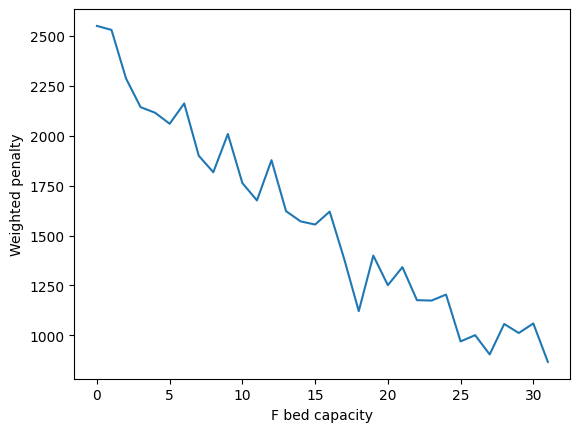

In [15]:
#plot the penalties
import matplotlib.pyplot as plt
plt.plot(penalties)
plt.xlabel("F bed capacity")
plt.ylabel("Weighted penalty")
plt.show()

In [21]:
#Number of beds required to ensure that 95% of the arrivals in F are admitted
F_bed_capacity = df["Bed Capacity"]["F"]
print("The number of beds required to ensure that 95% of the arrivals in F are admitted is: ", F_bed_capacity)

The number of beds required to ensure that 95% of the arrivals in F are admitted is:  31
